<a href="https://colab.research.google.com/github/omar-omar-om/Advanced_Algorithms/blob/main/tiktok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Connecting to my google drive**

In [13]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Reading the file from the drive**

In [14]:
file_path = '/content/drive/My Drive/tiktok_claims.csv'
df = pd.read_csv(file_path)
df.head(18)

,id,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [15]:
df.shape

(19382, 12)

# **Exploratory data analysis**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


As shown we have
- 8 numerical columns
- 4 categorical columns
- null values in the following columns
 - claim_status
 - video_transcription_text
 - video_view_count
 - video_like_count
 - video_share_count
 - video_download_count
 - video_comment_count

In [17]:
df.describe()

,id,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


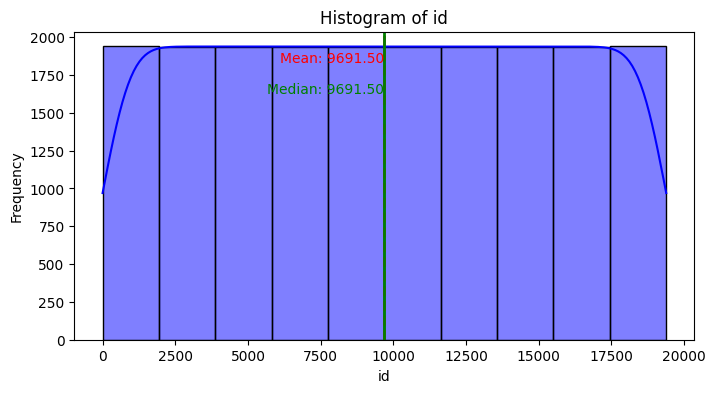

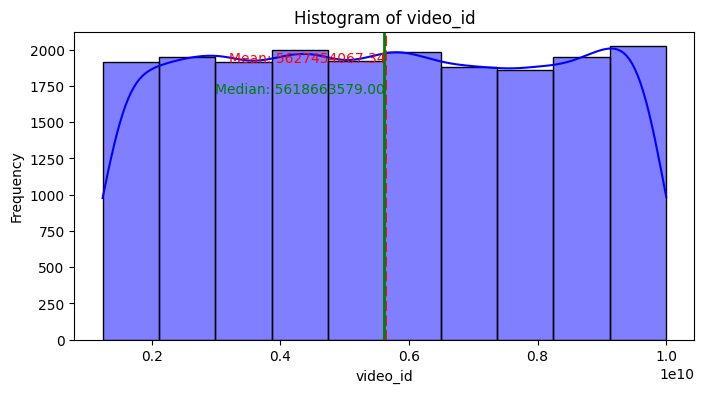

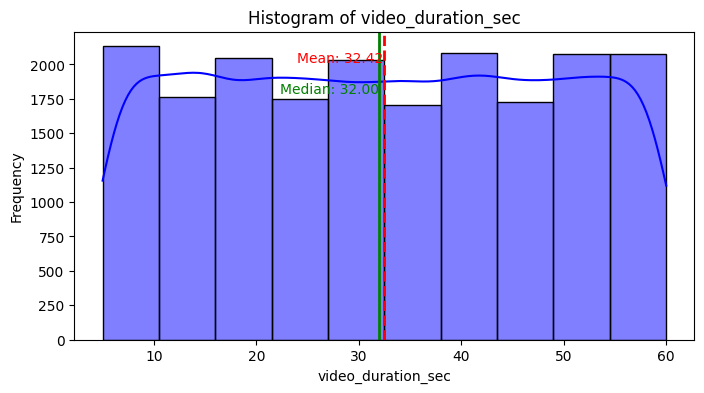

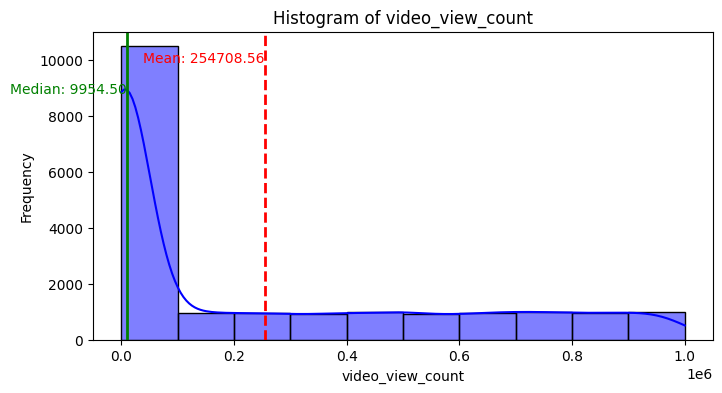

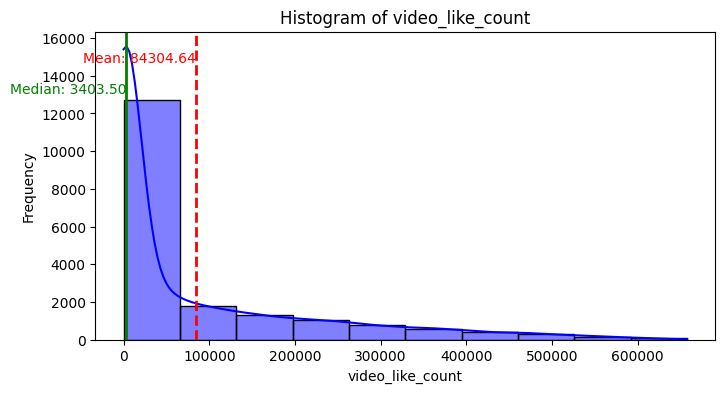

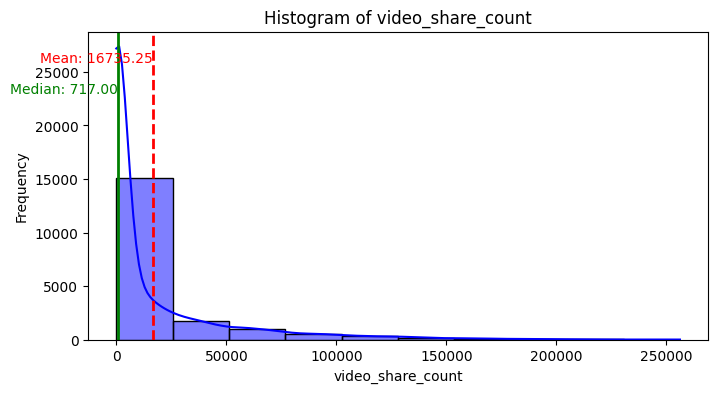

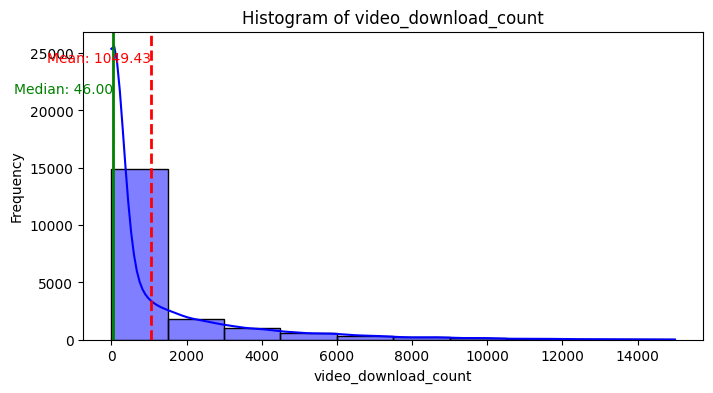

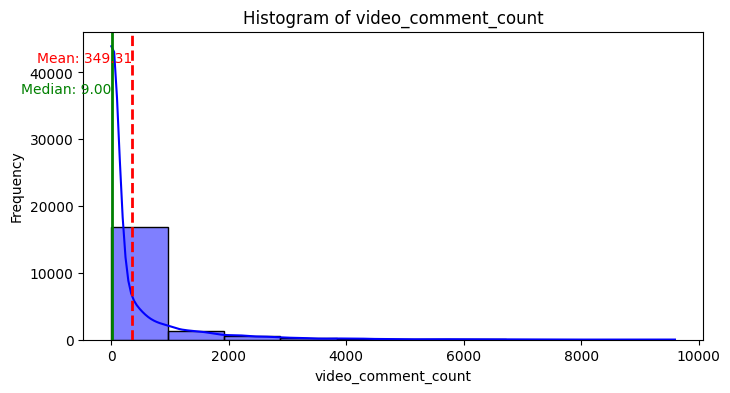

In [18]:

## histogram for each numerical column
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, color='blue', bins=10)
    mean_value = df[column].mean()
    median_value = df[column].median()

    plt.axvline(mean_value, color='r', linestyle='--', linewidth=2)
    plt.axvline(median_value, color='g', linestyle='-', linewidth=2)


    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')


    plt.text(mean_value, plt.ylim()[1] * 0.9, f'Mean: {mean_value:.2f}', color='red', ha='right')
    plt.text(median_value, plt.ylim()[1] * 0.8, f'Median: {median_value:.2f}', color='green', ha='right')

    plt.show()


The following can be taken from the histograms:
- All the numerical columns apart from the 'ID' , which will be dropped, are right skewed.
- For null values , imputing with median will be more effective than mean.

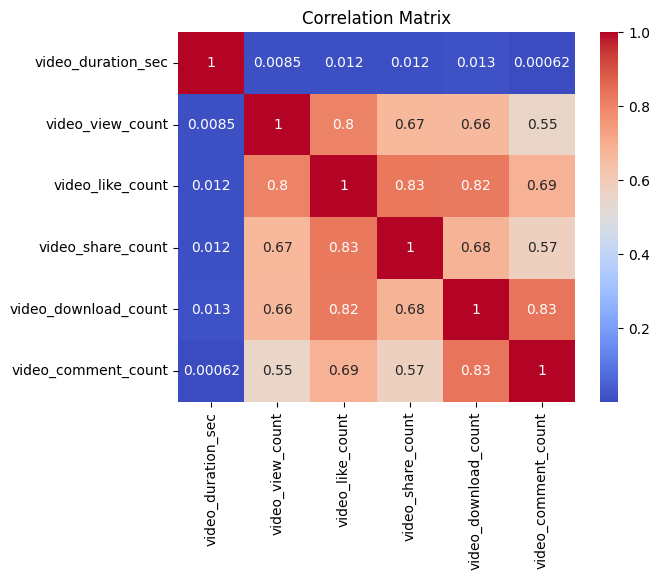

In [19]:
# Correlation
numeric_columns = ['video_duration_sec', 'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']
corr_matrix = df[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


From the correlation matrix here are some insights:

- Video View Count shows a strong positive correlation with Video Like Count (0.8), Video Share Count (0.67), and Video Download Count (0.66), indicating that videos with more views tend to receive more likes, shares, and downloads.
- Video Like Count is highly correlated with Video Share Count (0.83) and Video Download Count (0.82), suggesting that likes are a good predictor of how often a video is shared or downloaded.
- Video Download Count and Video Comment Count also show a positive correlation (0.83), indicating that videos that are downloaded frequently also tend to have more comments.
In summary , if video gets more views , it is most likely to get more likes , download , share and comments.

<ipython-input-20-ec224e0d41cf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=columns, palette='viridis')


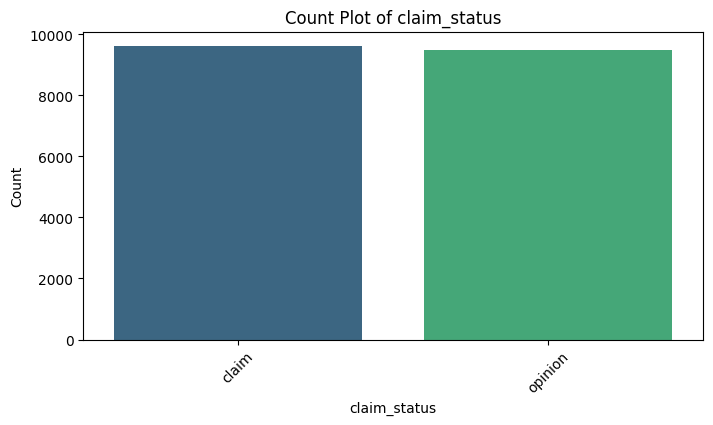

<ipython-input-20-ec224e0d41cf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=columns, palette='viridis')


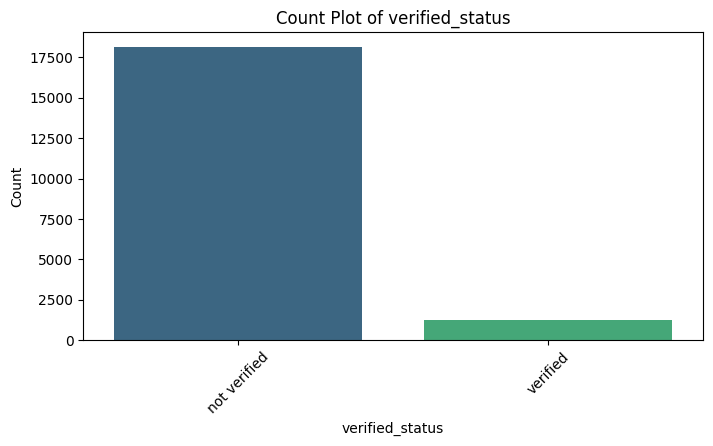

<ipython-input-20-ec224e0d41cf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=columns, palette='viridis')


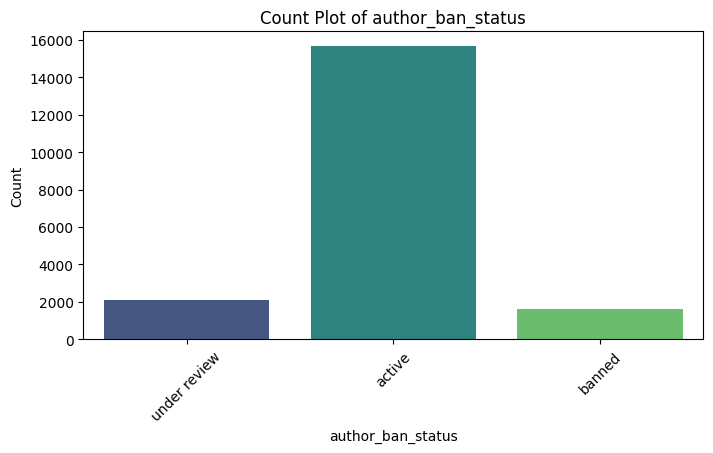

In [20]:
## bar graphs for categorical columns

for columns in df.select_dtypes(include=[object]).columns:
  if columns == 'video_transcription_text':
    continue
  else:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=columns, palette='viridis')
    plt.title(f'Count Plot of {columns}')
    plt.xlabel(columns)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


- 'claims' and 'opinions' seem to be very close , which is good for the machine learning model as this is my target variable.
- Most of the users seem to be 'unverified' , with a small proportion 'verified'.
- Most of the users seem to be 'active' , and the others are divided between 'under review' and 'banned'.

# **Data preprocessing**

In [21]:
df.isnull().sum()

,0
id,0
claim_status,298
video_id,0
video_duration_sec,0
video_transcription_text,298
verified_status,0
author_ban_status,0
video_view_count,298
video_like_count,298
video_share_count,298


As previously stated, these values could be imputed with the median, or they could be removed due to the large number of rows we already have. However, I will try to build models using both imputation and removal to compare their performance.

------------------------------------------------

## **Data cleaning**

### Video_trancript_text Handling

In [22]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Drop rows where 'video_transcription_text' is NaN
df_copy = df_copy.dropna(subset=['video_transcription_text'])

df_copy['video_transcription_text'] = df_copy['video_transcription_text'].astype(str)

# Extracting special characters
special_chars = Counter(re.findall(r'\W', ' '.join(df_copy['video_transcription_text'])))

special_chars



Counter({' ': 312745,
         '$': 140,
         ',': 1765,
         '.': 1367,
         '%': 1037,
         '(': 127,
         ')': 127,
         "'": 4613,
         '"': 596,
         '-': 995,
         '’': 1789,
         ':': 66,
         '‘': 73,
         '+': 66,
         '&': 71})

In [23]:
df_text_handled= df_copy.copy()
def clean_and_lemmatize(text):
    # Convert text to lower case
    text = text.lower()

    # Standardize apostrophes and quotation marks
    text = re.sub(r"[‘’]", "'", text)
    text = re.sub(r'[“”]', '"', text)

    # Remove unwanted punctuation while keeping $, %, +, -
    text = re.sub(r'[,.:;!?(){}[\]/\\]', "", text)

    # Trim extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in words])

    return lemmatized_text

# Apply the cleaning and lemmatization function to the DataFrame
df_text_handled['cleaned_text'] = df_text_handled['video_transcription_text'].apply(clean_and_lemmatize)


### Null handling

#### Method 1


In [24]:
df_median= df_text_handled.copy()

# Imputing missing numeric values with the median in the new DataFrame
numeric_columns = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']
df_median[numeric_columns] = df_median[numeric_columns].fillna(df_median[numeric_columns].median())
# this step is important to remove the null values from 'claim_status' column.
df_median.dropna(inplace=True)



#### Method 2


In [25]:
df_removed= df_text_handled.copy()

# removing all the null values
df_removed.dropna(inplace=True)

Any modifications to the DataFrame from this point forward will be applied to both DataFrames previously created.

### Duplicates handling

In [26]:
# Check duplicates in df_median
print("Duplicates in df_median:", df_median.duplicated().sum())
print("Duplicates in 'id' in df_median:", df_median['id'].duplicated().sum())
print("Duplicates in 'video_id' in df_median:", df_median['video_id'].duplicated().sum())

# Check duplicates in df_removed
print("Duplicates in df_removed:", df_removed.duplicated().sum())
print("Duplicates in 'id' in df_removed:", df_removed['id'].duplicated().sum())
print("Duplicates in 'video_id' in df_removed:", df_removed['video_id'].duplicated().sum())


Duplicates in df_median: 0
Duplicates in 'id' in df_median: 0
Duplicates in 'video_id' in df_median: 0
Duplicates in df_removed: 0
Duplicates in 'id' in df_removed: 0
Duplicates in 'video_id' in df_removed: 0


## Transformation

### One hot encoding

One-hot encoding will be used for categorical variables in this dataset, as they are nominal with no inherent order, making label encoding unnecessary.


#### Imputed df

In [31]:
df_median_encoded = pd.get_dummies(df_median, columns=['claim_status', 'author_ban_status', 'verified_status'])

#### Null removed df

In [32]:
df_removed_encoded = pd.get_dummies(df_removed, columns=['claim_status', 'author_ban_status', 'verified_status'])